In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score,r2_score, mean_squared_error  
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [30]:
feature = pd.read_csv('classification_feat.csv')
predictor = pd.read_csv('classification_pred.csv', header = 0)
feature['Quarter end'] = pd.to_datetime(feature['Quarter end'])
feature.set_index("Quarter end", inplace=True)
predictor = predictor.drop(columns = 'Unnamed: 0')

### Confusion Matrix Function Plot

In [31]:
labels = ['Growth', 'Value']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    # Compute confusion matrix
#     cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
#     print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### K Nearest Neighbor

In [32]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=7)
# the n_neighbors is the parameter where you specify k

In [34]:
#first model uses only pressure at 3p to predict whethter it will rain tomrorow
#can you improve it? 
y = predictor

X  = feature

In [35]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
no_symb = X_train.drop(columns = 'symbol')

### Cross Validation

In [37]:
knn_cv_score = cross_val_score(knn, no_symb, y_train, cv=3)
mean_knn_cv_score = np.mean(knn_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_knn_cv_score * 100))

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Mean Cross Validation Score: 76.15%


### Model Testing

In [38]:
knn.fit(no_symb, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [39]:
no_symtest = X_test.drop(columns='symbol')

In [41]:
# predict the response for new observations
test_preds = knn.predict(no_symtest)

In [43]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

# 0.7855382087099425

0.7855382087099425

In [44]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')



# Precision Score: 0.8647012885591566
# Recall Score: 0.8083591896331447
# Accuracy Score: 0.8697990587883768
# F1 Score: 0.8355815489104801

#               precision    recall  f1-score   support

#            0       0.87      0.91      0.89      7908
#            1       0.86      0.81      0.84      5479

#     accuracy                           0.87     13387
#    macro avg       0.87      0.86      0.86     13387
# weighted avg       0.87      0.87      0.87     13387

Precision Score: 0.7657969832857725
Recall Score: 0.6857090709983573
Accuracy Score: 0.7855382087099425
F1 Score: 0.7235435724602792

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      7908
           1       0.77      0.69      0.72      5479

    accuracy                           0.79     13387
   macro avg       0.78      0.77      0.77     13387
weighted avg       0.78      0.79      0.78     13387



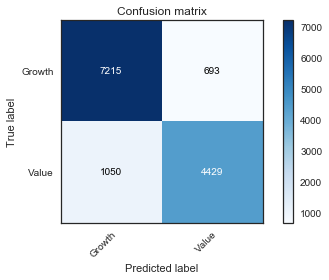

In [13]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Confusion matrix')

plt.show()

# print(confusion_matrix(y_test, test_preds, labels=None, sample_weight=None))

## Search Optimal Value Of K for KNN

In [14]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [15]:
find_best_k(X_train, y_train, X_test, y_test)

# Best Value for k: 1
# F1-Score: 0.7914230019493177

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/an

Best Value for k: 1
F1-Score: 0.7914230019493177


In [16]:
# search for an optimal value of K for KNN
k_range = list(range(1, 3))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

# [0.8316797105084601, 0.8011918954297232]

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[0.8316797105084601, 0.8011918954297232]


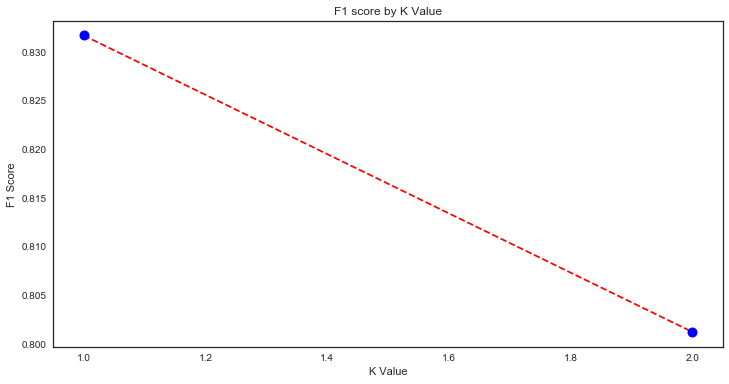

In [17]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

## Search Optimal Value Of K for KNN Standard Scalar

In [18]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [19]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors= 21)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [20]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/flatironschool/an

Best Value for k: 1
F1-Score: 0.8311401490751817


In [21]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')

# Precision Score: 0.8253593649431452
# Recall Score: 0.7021354261726592
# Accuracy Score: 0.8172854261597072
# F1 Score: 0.7587771203155819

#               precision    recall  f1-score   support

#            0       0.81      0.90      0.85      7908
#            1       0.83      0.70      0.76      5479

#     accuracy                           0.82     13387
#    macro avg       0.82      0.80      0.81     13387
# weighted avg       0.82      0.82      0.81     13387

Precision Score: 0.8253593649431452
Recall Score: 0.7021354261726592
Accuracy Score: 0.8172854261597072
F1 Score: 0.7587771203155819

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      7908
           1       0.83      0.70      0.76      5479

    accuracy                           0.82     13387
   macro avg       0.82      0.80      0.81     13387
weighted avg       0.82      0.82      0.81     13387



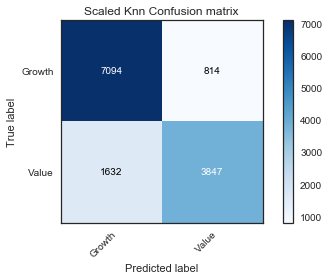

In [22]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Knn Confusion matrix')

plt.show()

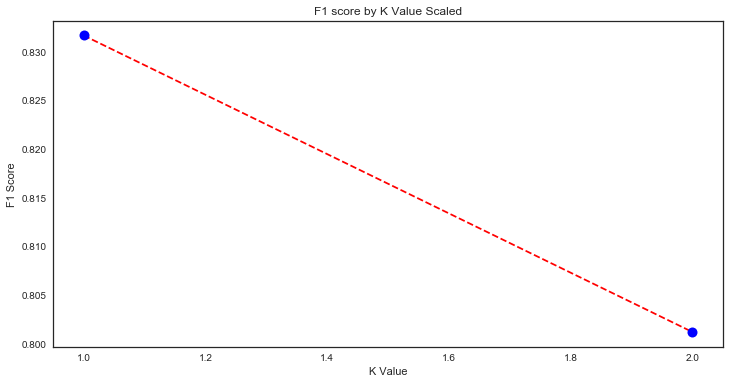

In [23]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value Scaled')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

## Grid Search KNN

In [24]:
knn_grid_param = {'n_neighbors': [3,5,9,17,21],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan'] }
knn_grid_search = GridSearchCV(knn, knn_grid_param, verbose=1, cv=3, n_jobs=-1)

knn_gs_results = knn_grid_search.fit(X_train, y_train)

# Fitting 3 folds for each of 20 candidates, totalling 60 fits

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.2min finished
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [25]:
# knn_gs_training_score = np.mean(knn_grid_search.cv_results_['mean_train_score'])
# knn_gs_testing_score =  knn_grid_search.score(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = knn_grid_search.predict(X_test)

# New Model Evaluation metrics 
# print("Mean Training Score:", knn_gs_training_score*100)
# print("Mean Testing Score:", knn_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(knn_grid_search.best_params_)
print("\nBest Estimator Found:")
print(knn_grid_search.best_estimator_)
print("Besti Score Found:")
print(knn_grid_search.best_score_)

# Accuracy Score : 0.8370807499813252
# Precision Score : 0.8214424951267056
# Recall Score : 0.7691184522723125
# F1 Score : 0.7944198322179282
# Best Parameter Found:
# {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

# Best Estimator Found:
# KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
#                      metric_params=None, n_jobs=None, n_neighbors=3, p=2,
#                      weights='distance')
# Besti Score Found:
# 0.8081975054269841

Accuracy Score : 0.8370807499813252
Precision Score : 0.8214424951267056
Recall Score : 0.7691184522723125
F1 Score : 0.7944198322179282
Best Parameter Found:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Best Estimator Found:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')
Besti Score Found:
0.8081975054269841


### Grid Search Confusion Matrix

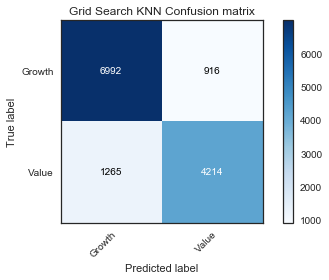

In [26]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Grid Search KNN Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)